# Week 3
- 1. Data preprocessing
- 2. Word cloud
- 3. Feature engineering
- 4. Logistic regression 

In [1]:
# Load packages
import pandas as pd
import matplotlib.pyplot as plt

#df = pd.read_csv("sentiment140.csv", encoding = "cp1252", header=None)
#df.columns =['score', 'id', 'time', 'query', 'user_name', 'comment']
#df = df.drop(['id', 'time', 'query', 'user_name'], axis=1)
#df.comment.isnull().sum()
#df.to_csv("sentiment140_new.csv", encoding="utf-8")

In [2]:
# Open file, drop column
df = pd.read_csv("sentiment140_new.csv")
df = df.drop("Unnamed: 0", axis=1)

In [3]:
df.head()

,score,comment
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   score    1600000 non-null  int64 
 1   comment  1600000 non-null  object
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


In [5]:
# Only score 0 and score 4
score_cnt = df.groupby("score")["comment"].count()/len(df)
score_cnt

score
0    0.5
4    0.5
Name: comment, dtype: float64

In [6]:
# COnvert score 4 to score 1
df.loc[df.score == 4, 'score'] = 1
score_cnt_new = df.groupby("score")["comment"].count()/len(df)
score_cnt_new

score
0    0.5
1    0.5
Name: comment, dtype: float64

In [7]:
# Select only positive comments and compile the first 5 texts into a single string
positive_comment = df.loc[df['score'] == 1]
comment_str = positive_comment.comment[:5].str.cat(sep=' ')

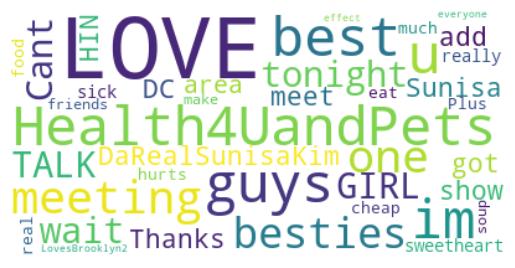

In [8]:
# Import the word cloud function and stop words list
from wordcloud import WordCloud, STOPWORDS 

# Define the list of stopwords
my_stop_words = STOPWORDS.update(['tweet', 'twitter'])

# Create and generate a word cloud image
my_cloud = WordCloud(background_color="white", stopwords=my_stop_words).generate(comment_str)

# Display the generated wordcloud image
plt.imshow(my_cloud, interpolation='bilinear') 
plt.axis("off")
# Don't forget to show the final image
plt.show()

In [9]:
from nltk import word_tokenize

# Tokenize each item in the review column
word_tokens = [word_tokenize(com) for com in df.comment]

# Create an empty list to store the length of the reviews
len_tokens = []

# Iterate over the word_tokens list and determine the length of each item
for i in range(len(word_tokens)):
     len_tokens.append(len(word_tokens[i]))

In [10]:
# Create a new feature for the lengh of each review
df['n_words'] = len_tokens 

In [11]:
df.head()

,score,comment,n_words
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",27
1,0,is upset that he can't update his Facebook by ...,25
2,0,@Kenichan I dived many times for the ball. Man...,21
3,0,my whole body feels itchy and like its on fire,10
4,0,"@nationwideclass no, it's not behaving at all....",30


In [12]:
# Import the TfidfVectorizer and default list of English stop words
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS 

# Build the vectorizer
vect = TfidfVectorizer(stop_words=ENGLISH_STOP_WORDS, 
                       ngram_range=(1, 2), 
                       max_features=50, 
                       token_pattern=r'\b[^\d\W][^\d\W]+\b').fit(df.comment)
# Create sparse matrix from the vectorizer
X = vect.transform(df.comment)

# Create a DataFrame
reviews_transformed = pd.DataFrame(X.toarray(), columns=vect.get_feature_names_out())

In [13]:
reviews_transformed.head()

,amp,bad,com,come,day,did,don,feel,fun,going,...,time,today,tomorrow,tonight,twitter,ve,want,way,wish,work
0,0.0,0.0,0.526931,0.0,0.471249,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# Merge two dataset to include score and n_words, no comments
df = df.drop('comment', axis=1)
df.head()

,score,n_words
0,0,27
1,0,25
2,0,21
3,0,10
4,0,30


In [15]:
reviews_transformed = reviews_transformed.merge(df, left_index=True, right_index=True)

In [16]:
reviews_transformed.columns

Index(['amp', 'bad', 'com', 'come', 'day', 'did', 'don', 'feel', 'fun',
       'going', 'good', 'got', 'great', 'haha', 'happy', 'home', 'hope',
       'http', 'im', 'just', 'know', 'like', 'll', 'lol', 'love', 'make',
       'miss', 'morning', 'need', 'new', 'night', 'oh', 'quot', 'really',
       'right', 'sad', 'sleep', 'sorry', 'thanks', 'think', 'time', 'today',
       'tomorrow', 'tonight', 'twitter', 've', 'want', 'way', 'wish', 'work',
       'score', 'n_words'],
      dtype='object')

In [17]:
len(reviews_transformed.index)

1600000

In [18]:
reviews_transformed.head()

,amp,bad,com,come,day,did,don,feel,fun,going,...,tomorrow,tonight,twitter,ve,want,way,wish,work,score,n_words
0,0.0,0.0,0.526931,0.0,0.471249,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,27
1,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,25
2,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,21
3,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,10
4,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,30


In [19]:
# Import the logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Define X and y
y = reviews_transformed.score
X = reviews_transformed.drop('score', axis=1)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=456)

# Train a logistic regression
log_reg = LogisticRegression().fit(X_train, y_train)
# Predict the labels
y_predicted = log_reg.predict(X_test)

# Print accuracy score and confusion matrix on test set
print('Accuracy on the test set: ', accuracy_score(y_test, y_predicted))
print(confusion_matrix(y_test, y_predicted)/len(y_test))

Accuracy on the test set:  0.619371875
[[0.30405    0.19595   ]
 [0.18467812 0.31532187]]


In [20]:
# Train a logistic regression
log_reg = LogisticRegression(penalty='l2', C=7).fit(X_train, y_train)
# Predict the labels
y_predicted = log_reg.predict(X_test)

# Print accuracy score and confusion matrix on test set
print('Accuracy on the test set: ', accuracy_score(y_test, y_predicted))
print(confusion_matrix(y_test, y_predicted)/len(y_test))

Accuracy on the test set:  0.61939375
[[0.30405938 0.19594063]
 [0.18466562 0.31533438]]
